SVR is a non-linear regression model

In [1]:
#loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.formula.api as sm

In [3]:
dataset = pd.read_csv('C:/Users/GIIRIDHAR/Desktop/MLDS2019/MLDS2019/Machine Learning A-Z Template Folder/Part 2 - Regression/Support_Vector_Regression/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [30]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1:].values
X, y

#apply feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

C:\Users\GIIRIDHAR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [32]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf').fit(X, y) #kernel is the important kernel
y_pred = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

C:\Users\GIIRIDHAR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 170370.0204065])

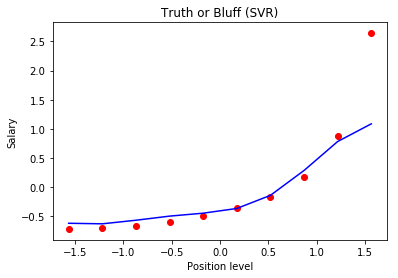

In [33]:
#Visualizing the linear model
plt.scatter(X, y, color = "Red")
plt.plot(X, svr_regressor.predict(X), color = "Blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()